# Task 1 : Prediction using Supervised Model

## Predict the Percentage of student based on no of Study Hours

#### Import  Liabraries & Data

In [1]:
# Liabraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data

url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [2]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Data Summary

In [3]:
# shape of Data

data.shape

(25, 2)

In [4]:
# Summary of data

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Percentage')

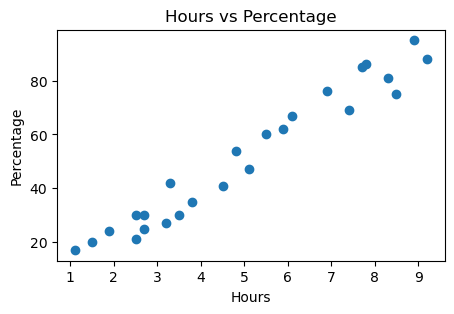

In [5]:
# Visualizing data distribution using scatter plot
plt.figure(figsize = (5,3))
plt.scatter(data['Hours'],data['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')

##### As the scatter plot illustrates, More study hours equals a higher proportion of the score
##### Let's create a linear regression model that can forecast how many study hours a student has to complete in order to get decent grades.

In [6]:
# Splitting independent and dependent variable

x = data.iloc[:,:-1].values  # All data except last column
y = data.iloc[:,-1].values   # target column

# splitting dataset into train and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

##### Training train data using simple linear regression model

In [7]:
# importing regression model from sklearn library
from sklearn.linear_model import LinearRegression

# creating instance for model
regressor = LinearRegression()

# model fitting using train data
regressor.fit(x_train,y_train)

LinearRegression()

Intercept : 2.370815382341881
Slope : [9.78856669]


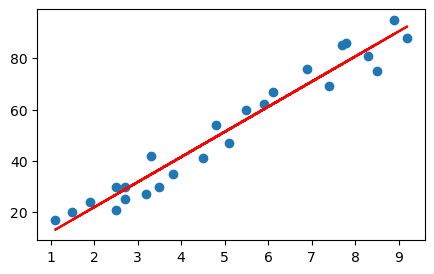

In [8]:
# calculating regression line 

print(f'Intercept : {regressor.intercept_}')
print(f'Slope : {regressor.coef_}')

line = regressor.coef_ * x + regressor.intercept_

# plotting line

plt.figure(figsize = (5,3))
plt.scatter(x,y)
plt.plot(x, line, color = 'red')

In [9]:
# Predicting results using x_test data
y_pred = regressor.predict(x_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

Text(0, 0.5, 'Percentage of marks')

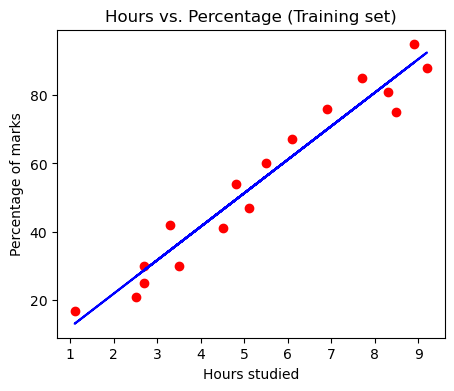

In [10]:
# Visualizing Prediction on training  data

plt.figure(figsize = (5,4))
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')

Text(0, 0.5, 'Percentage of marks')

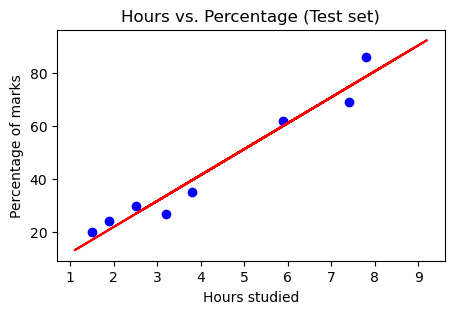

In [11]:
# Visualizing Prediction on test  data

plt.figure(figsize = (5,3))
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_train, regressor.predict(x_train), color = 'red')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')

In [12]:
# Comparing predicted vs actual results

result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [13]:
result = np.array(9.2) # Max Hours
result = result.reshape(-1,1)
pred = regressor.predict(result)

print('If a student studies for 9.2 hours/day, they can score {}'.format(pred))

If a student studies for 9.2 hours/day, they can score [92.4256289]


#### Error Metrics

In [14]:
from sklearn import metrics 
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred))


from sklearn.metrics import r2_score
print('R-Square : ', r2_score(y_test,y_pred))

Mean Absolute Error :  4.419727808027652
R-Square :  0.9568211104435257


# Task 2 : Prediction Using Unsupervised Machine Learning Model

## Predict optimum number of clusters and represent it visually

In [15]:
# Liabraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [16]:
# Load Data 

data = datasets.load_iris()

In [17]:
data["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [18]:
data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

We are using iris flower attributes to divide them into 3 different species (Setosa, versicolor and viriginica)

We are using sepal length and width, petal length and width attributes to predict the category of iris flower

This is multiclass classification problem.

#### Creating data frame using pandas DataFrame

We will convert our aaray data into pandas dataframe

In [19]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])

In [20]:
df['target'] = data['target']

In [21]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Descriptive Satistics of data

In [22]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


#### Distribution of Features 

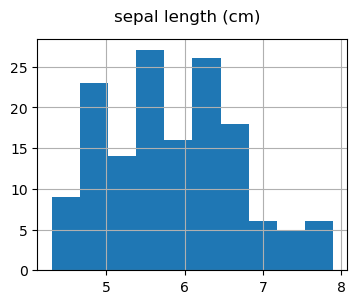

In [24]:
#col = df['sepal length (cm)'].hist()
col = "sepal length (cm)"
plt.figure(figsize=(4,3))
df[col].hist()
plt.suptitle(col)
plt.show()

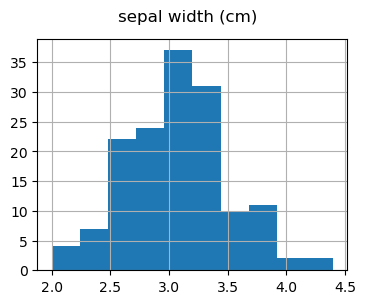

In [25]:
col = "sepal width (cm)"
plt.figure(figsize=(4,3))
df[col].hist()
plt.suptitle(col)
plt.show()

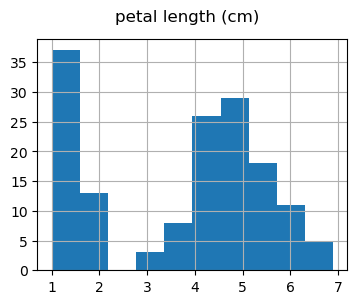

In [26]:
col = "petal length (cm)"
plt.figure(figsize=(4,3))
df[col].hist()
plt.suptitle(col)
plt.show()

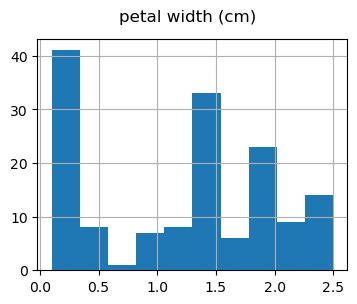

In [27]:
col = "petal width (cm)"
plt.figure(figsize=(4,3))
df[col].hist()
plt.suptitle(col)
plt.show()

#### Relationship of features with Target Variable

In [28]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
df['target_name'] = df['target'].map({0:'setosa', 1: 'versicolor',2:'virginica'})

In [30]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


D:\Python Programs\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


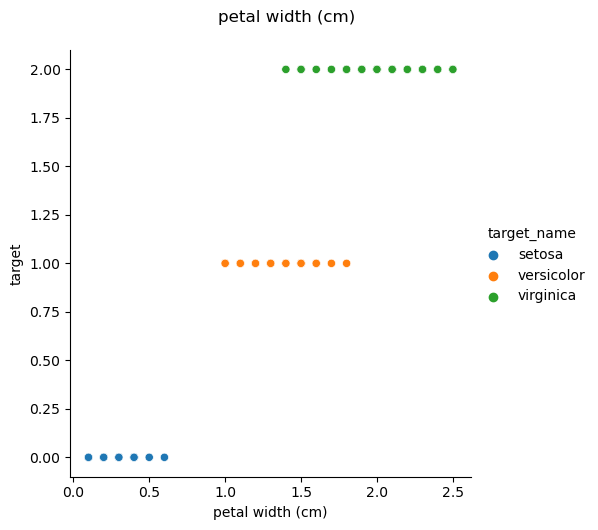

In [31]:
#plt.figure(figsize=(2,2))
col = "petal width (cm)"
sns.relplot(x = col, y = 'target', hue = 'target_name', data = df)
plt.suptitle(col, y = 1.05)
plt.show()

D:\Python Programs\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


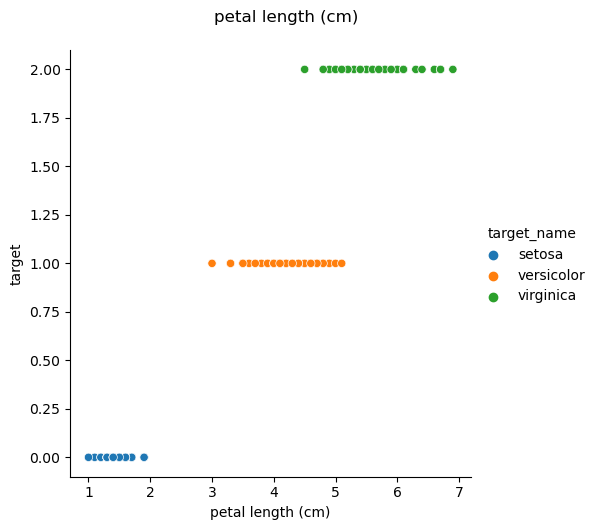

In [32]:
col = "petal length (cm)"
sns.relplot(x = col, y = 'target', hue = 'target_name', data = df)
plt.suptitle(col, y = 1.05)
plt.show()

D:\Python Programs\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


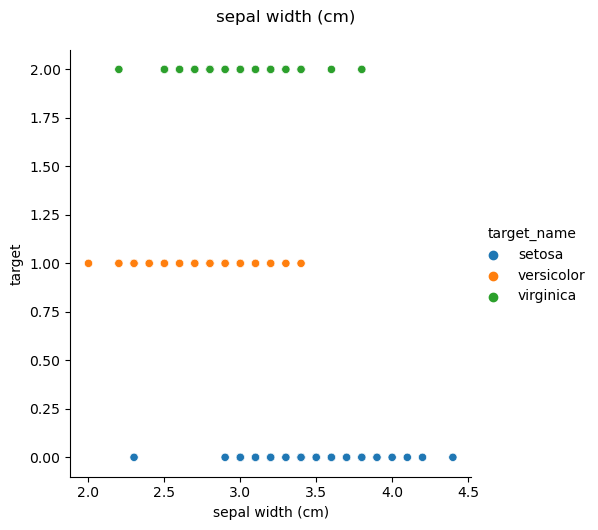

In [33]:
col = "sepal width (cm)"
sns.relplot(x = col, y = 'target', hue = 'target_name', data = df)
plt.suptitle(col, y = 1.05)
plt.show()

D:\Python Programs\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


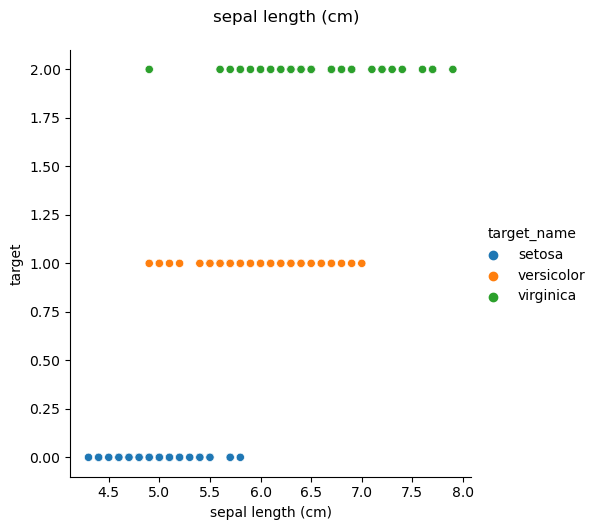

In [34]:
col = "sepal length (cm)"
sns.relplot(x = col, y = 'target', hue = 'target_name', data = df)
plt.suptitle(col, y = 1.05)
plt.show()

From the above graphs we can see that versicolor and virginica species have relationship between them, it will be difficult to differintiate between this two species. 

Based on petal width,length we can differentiate setosa species.

#### Exploratory Data Analysis

D:\Python Programs\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


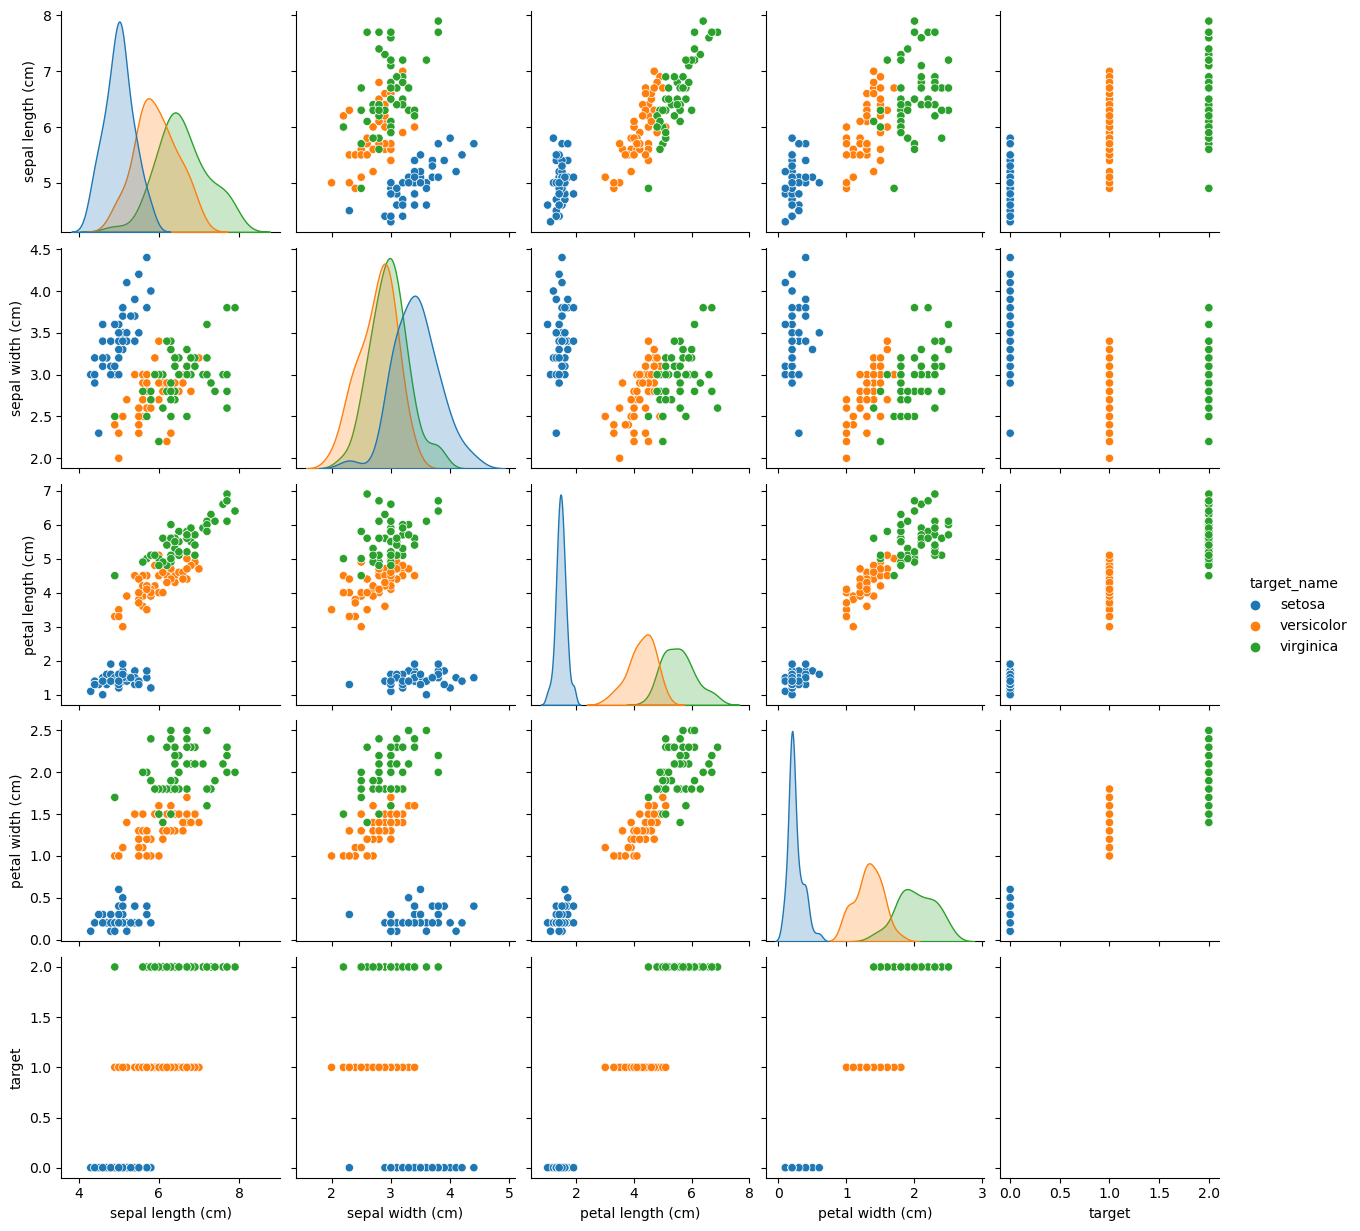

In [35]:
sns.pairplot(df, hue = 'target_name')

#### Finding Outliers

From Boxplot we can analyze that, Sepal Width column has outliers. We need to remove this outliers so our model can work efficiently. 

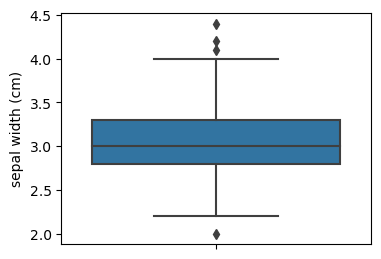

In [36]:
plt.figure(figsize = (4,3))
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

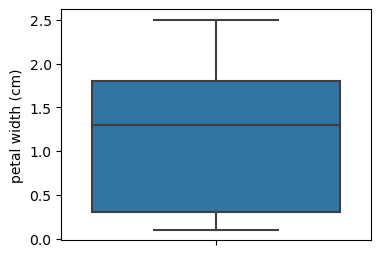

In [37]:
plt.figure(figsize = (4,3))
sns.boxplot(y=df['petal width (cm)'])
plt.show()

In [38]:
# To remove outliers from 'sepal width (cm)'
q1 = df['sepal width (cm)'].quantile(0.25)
q3 = df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
df = df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q3+1.5*iqr)]
df.shape # To find out the number of rows and column after outlier treatment

(146, 6)

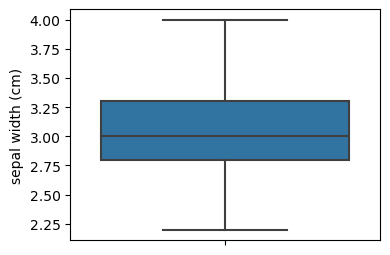

In [39]:
plt.figure(figsize = (4,3))
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

#### Splitting data into Train & Test

In [40]:
data = df.values
X = data[:,0:4]  # Input Column
Y = data[:,-1]  # Output Column

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

In [42]:
print(y_test)

['versicolor' 'virginica' 'setosa' 'versicolor' 'setosa' 'virginica'
 'virginica' 'setosa' 'setosa' 'virginica' 'virginica' 'setosa'
 'versicolor' 'virginica' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica'
 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor' 'virginica'
 'versicolor']


#### Model - Logistic Regression 

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

D:\Python Programs\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8918918918918919


#### Classification Report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.80      0.80      0.80        10
   virginica       0.89      0.89      0.89        18

    accuracy                           0.89        37
   macro avg       0.90      0.90      0.90        37
weighted avg       0.89      0.89      0.89        37



# Task 3 - Exploratory Data Analysis [Retail]

#### Importing Libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing Dataset

In [47]:
data = pd.read_csv('D:/Downloads/SampleSuperstore.csv')
df = pd.DataFrame(data)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### Data Summary

In [48]:
df.isna().sum()  # Null Values Count

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [50]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Correlation 

In [51]:
Data_corr = df.corr(method = "pearson", numeric_only = True)
Data_corr

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<Axes: >

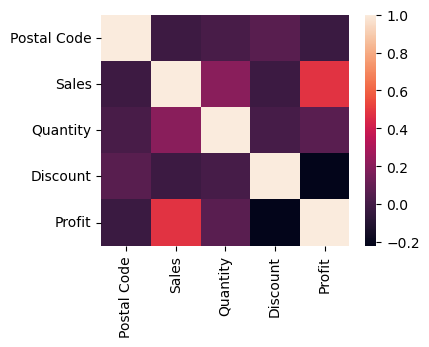

In [57]:
plt.figure(figsize=(4,3))
sns.heatmap(Data_corr)

#### Distribution of Data

<Axes: xlabel='Ship Mode', ylabel='count'>

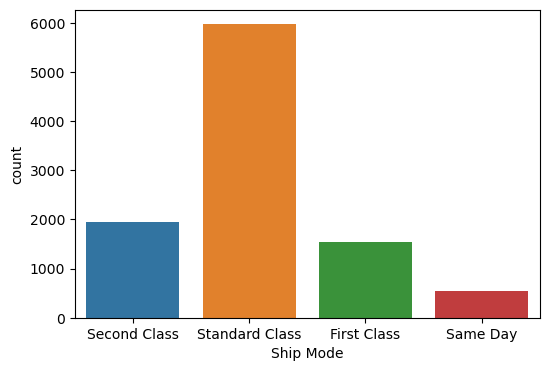

In [61]:
plt.figure(figsize = (6,4))
sns.countplot(df, x='Ship Mode')

<Axes: xlabel='Segment', ylabel='count'>

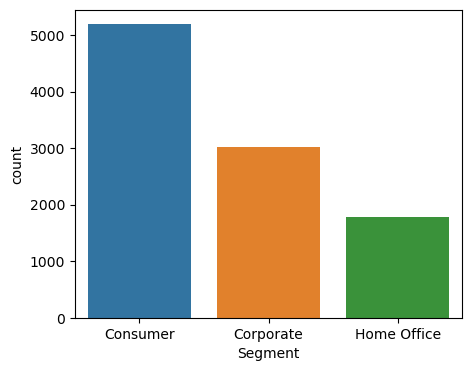

In [63]:
plt.figure(figsize = (5,4))
sns.countplot(df, x='Segment')

<Axes: xlabel='Category', ylabel='count'>

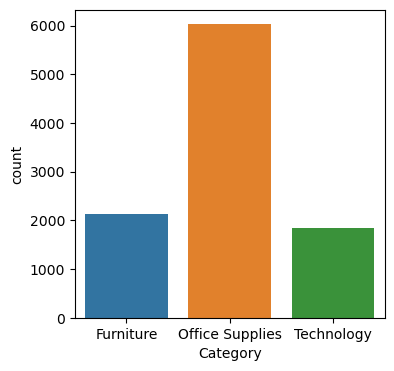

In [65]:
plt.figure(figsize = (4,4))
sns.countplot(df, x='Category')

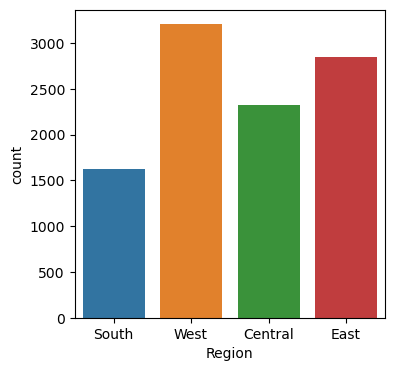

In [84]:
plt.figure(figsize = (4,4))
sns.countplot(df, x='Region')
plt.show()

D:\Python Programs\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x500 with 0 Axes>

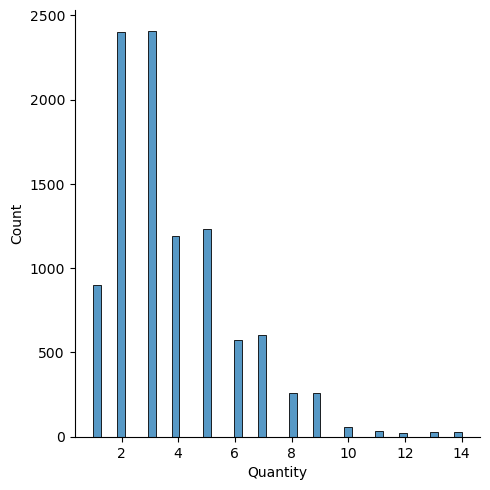

In [93]:
plt.figure(figsize = (4,5))
sns.displot(df['Quantity'])

#### Exploratory Data Analysis

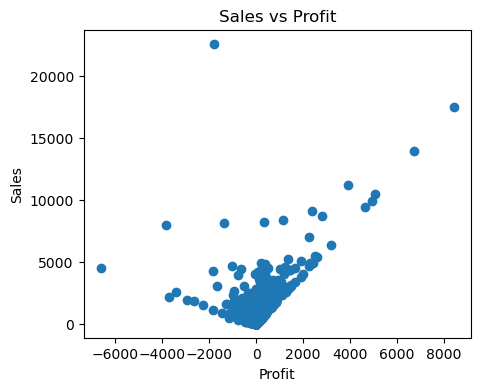

In [91]:
plt.figure(figsize = (5,4))
y = df['Sales']
x = df['Profit']
plt.scatter(x,y)
plt.title("Sales vs Profit")
plt.xlabel("Profit")
plt.ylabel("Sales")
plt.show()

#### Sales of Store

In [108]:
top_stats = df.groupby(['State']).sum().sort_values('Sales', ascending=False).head(10)
top_stats = top_stats[['Sales']].round(2)
top_stats.reset_index(inplace=True)
top_stats

,State,Sales
0,California,457687.63
1,New York,310876.27
2,Texas,170188.05
3,Washington,138641.27
4,Pennsylvania,116511.91
5,Florida,89473.71
6,Illinois,80166.10
7,Ohio,78258.14
8,Michigan,76269.61
9,Virginia,70636.72


In [116]:
category_sales = df.groupby(['Category']).sum().sort_values('Sales',ascending=False)
category_sales = category_sales[['Sales']].round(2).reset_index()
category_sales

,Category,Sales
0,Technology,836154.03
1,Furniture,741999.80
2,Office Supplies,719047.03


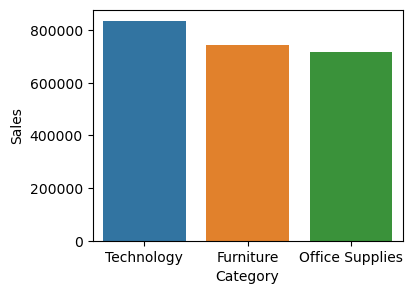

In [119]:
plt.figure(figsize = (4,3))
sns.barplot(data=category_sales, x='Category', y='Sales')
plt.show()


In [120]:
segment_sales = df.groupby(['Segment']).sum().sort_values('Sales',ascending=False)
segment_sales = segment_sales[['Sales']].round(2).reset_index()
segment_sales

,Segment,Sales
0,Consumer,1161401.34
1,Corporate,706146.37
2,Home Office,429653.15


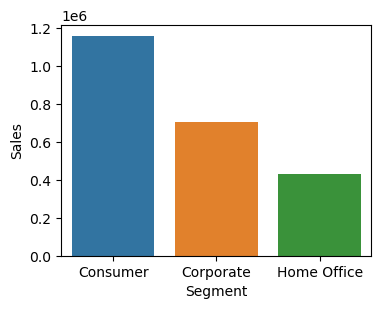

In [121]:
plt.figure(figsize = (4,3))
sns.barplot(data=segment_sales, x='Segment', y='Sales')
plt.show()

In [125]:
state_sales = df.groupby(['State']).sum().sort_values('Sales',ascending=False).head(10)
state_sales = state_sales[['Sales']].round(2).reset_index()
state_sales

,State,Sales
0,California,457687.63
1,New York,310876.27
2,Texas,170188.05
3,Washington,138641.27
4,Pennsylvania,116511.91
5,Florida,89473.71
6,Illinois,80166.10
7,Ohio,78258.14
8,Michigan,76269.61
9,Virginia,70636.72


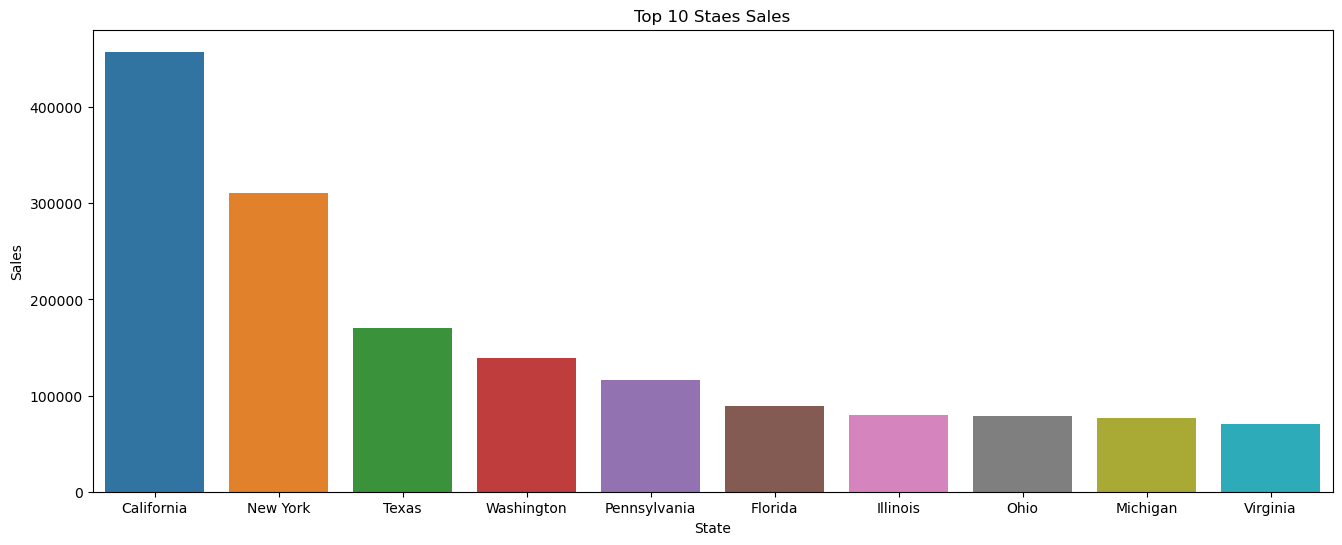

In [129]:
plt.figure(figsize = (16,6))
sns.barplot(data=state_sales, x='State', y='Sales')
plt.title("Top 10 Staes Sales")
plt.show()

In [128]:
city_sales = df.groupby(['City']).sum().sort_values('Sales',ascending=False).head(10)
city_sales = city_sales[['Sales']].round(2).reset_index()
city_sales

,City,Sales
0,New York City,256368.16
1,Los Angeles,175851.34
2,Seattle,119540.74
3,San Francisco,112669.09
4,Philadelphia,109077.01
5,Houston,64504.76
6,Chicago,48539.54
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Springfield,43054.34


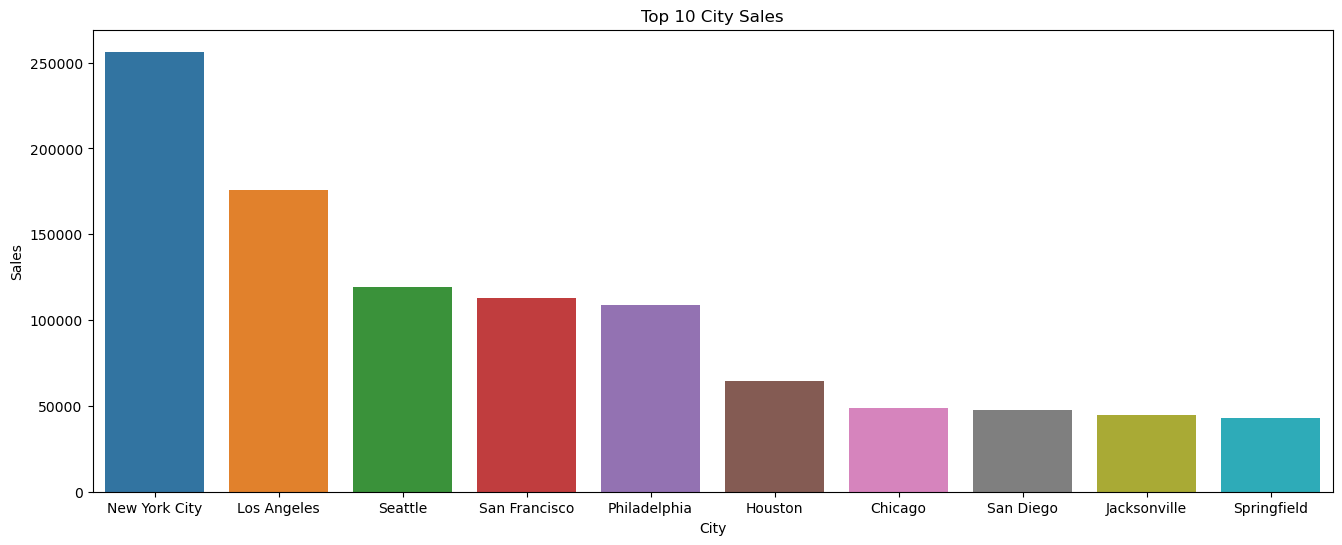

In [131]:
plt.figure(figsize = (16,6))
sns.barplot(data=city_sales, x='City', y='Sales')
plt.title("Top 10 City Sales")
plt.show()

#### Profit
Category, Region, subcategory -10, segment

In [132]:
category_profit = df.groupby(['Category']).sum().sort_values('Profit', ascending= False)
category_profit = category_profit[['Profit']].round(2).reset_index()
category_profit

,Category,Profit
0,Technology,145454.95
1,Office Supplies,122490.80
2,Furniture,18451.27


In [134]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  (${v:d})'.format(p=pct,v=val)
    return my_autopct

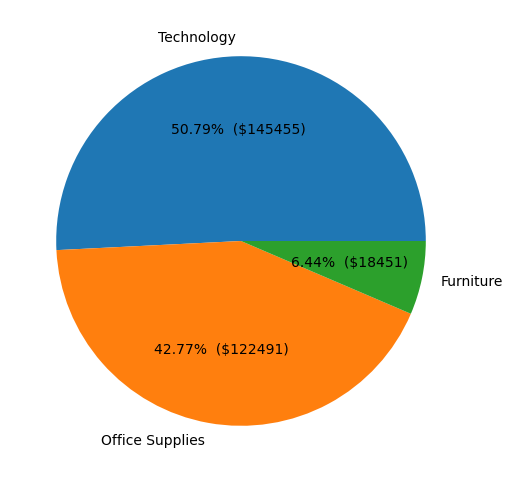

In [150]:
plt.figure(figsize=(6,6))
plt.pie(category_profit['Profit'], labels=category_profit['Category'],autopct=make_autopct(category_profit['Profit']))
plt.show()

In [137]:
region_profit = df.groupby(['Region']).sum().sort_values(['Profit'],ascending=False)
region_profit = region_profit[['Profit']].round(2).reset_index()
region_profit

,Region,Profit
0,West,108418.45
1,East,91522.78
2,South,46749.43
3,Central,39706.36


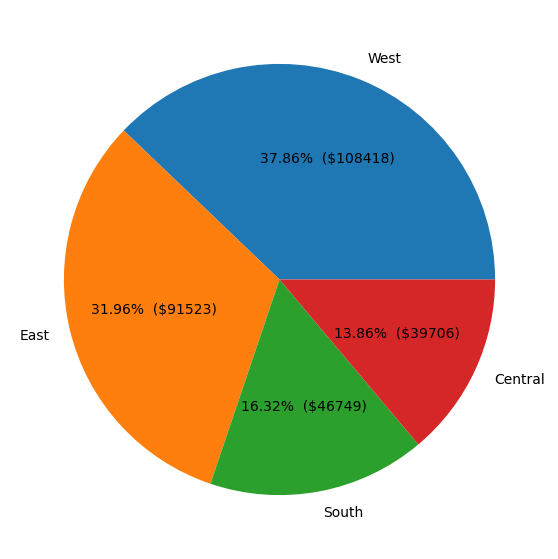

In [147]:
plt.figure(figsize= (7,7))
plt.pie(region_profit['Profit'], labels = region_profit['Region'], autopct=make_autopct(region_profit['Profit']))
plt.show()

In [151]:
subcat_profit = df.groupby(['Sub-Category']).sum().sort_values(['Profit'], ascending=False).head(10)
subcat_profit = subcat_profit[['Profit']].round(2).reset_index()
subcat_profit

,Sub-Category,Profit
0,Copiers,55617.82
1,Phones,44515.73
2,Accessories,41936.64
3,Paper,34053.57
4,Binders,30221.76
5,Chairs,26590.17
6,Storage,21278.83
7,Appliances,18138.01
8,Furnishings,13059.14
9,Envelopes,6964.18


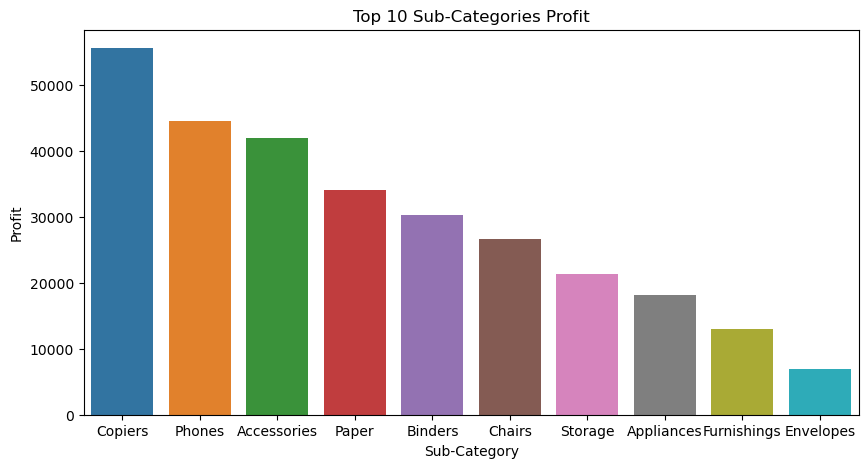

In [159]:
plt.figure(figsize=(10,5))
sns.barplot(data = subcat_profit, x = 'Sub-Category', y = 'Profit')
plt.title("Top 10 Sub-Categories Profit")
plt.show()

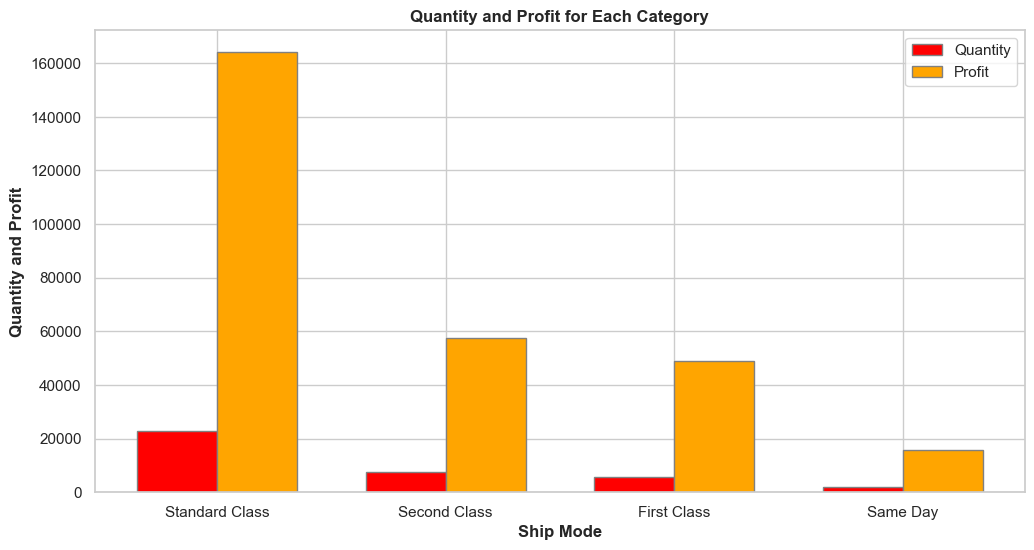

In [168]:
category_quantity_profit = df.groupby(['Ship Mode']).agg({'Quantity': 'sum', 'Profit': 'sum'}).sort_values('Quantity', ascending=False)
category_quantity_profit = category_quantity_profit.round(2).reset_index()

# Create a grouped bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

barWidth = 0.35

# Set position of bar on X axis
r1 = range(len(category_quantity_profit))
r2 = [x + barWidth for x in r1]

# Plot bars
plt.bar(r1, category_quantity_profit['Quantity'], color='red', width=barWidth, edgecolor='grey', label='Quantity')
plt.bar(r2, category_quantity_profit['Profit'], color='Orange', width=barWidth, edgecolor='grey', label='Profit')

# Add labels and legend
plt.xlabel('Ship Mode', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(category_quantity_profit))], category_quantity_profit['Ship Mode'])
plt.ylabel('Quantity and Profit', fontweight='bold')
plt.title('Quantity and Profit for Each Category', fontweight='bold')
plt.legend()

# Show the plot
plt.show()


In [167]:
df.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
